**Twitter Sentiment Analysis using Natural Language Processing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df = pd.read_csv(r'archive/train.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


[0] indicates positive sentiments and [1] indicates negative sentiments

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Preprocessing of Data

In [5]:
def remove_it(input_text,pattern):
    to_be_removed = re.findall(pattern, input_text)
    for word in to_be_removed:
        input_text = re.sub(word, "", input_text) 
    return input_text

In [6]:
df['clean_tweet'] = np.vectorize(remove_it)(df['tweet'], "@[\w]*")
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [7]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [8]:
tokenized_tweet = df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [9]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(word) for word in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [10]:
#Combine into single sentence and store in clean tweets
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


Exploratory Data Analysis

In [11]:
#visualize frequency of words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

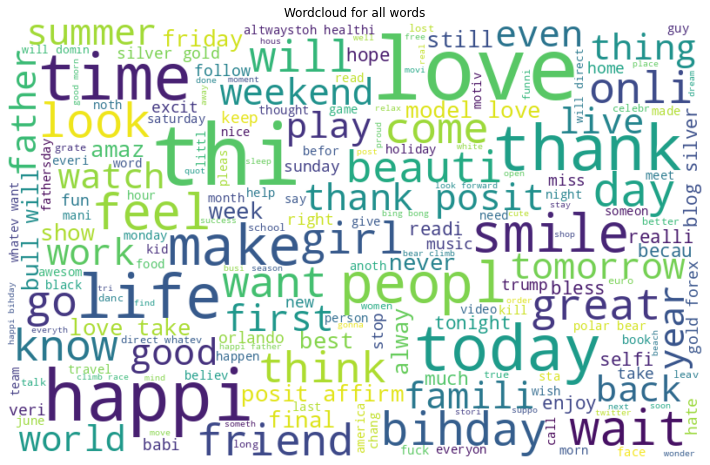

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for all words')
plt.show()

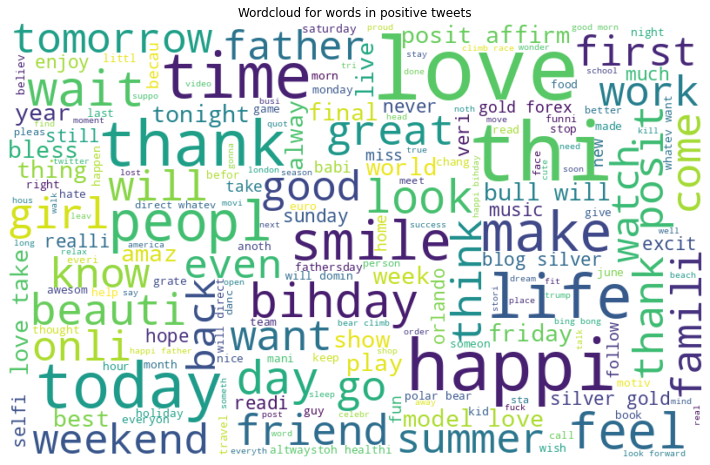

In [18]:
pos_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud_pos = WordCloud(background_color = 'white', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(pos_words)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for words in positive tweets')
plt.show()

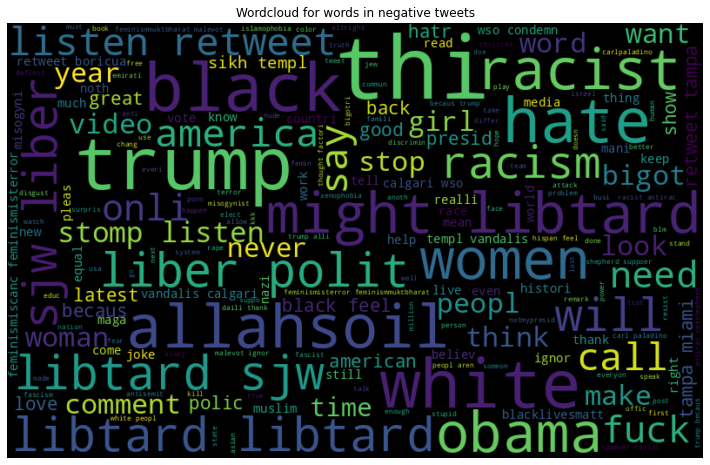

In [19]:
neg_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud_neg = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(neg_words)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for words in negative tweets')
plt.show()

In [24]:
def extract_hashtags(tweet):
    hashtags = []
    for word in tweet:
        ht = re.findall(r"#(\w+)", word)
        hashtags.append(ht)
    return hashtags

In [25]:
ht_pos = extract_hashtags(df['clean_tweet'][df['label']==0])

ht_neg = extract_hashtags(df['clean_tweet'][df['label']==1])

In [28]:
print(ht_pos[:10])

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv'], ['allshowandnogo'], [], ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'], ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'], []]


In [29]:
#function for un-nesting list
ht_pos = sum(ht_pos, [])
ht_neg = sum(ht_neg, [])

In [30]:
print(ht_pos[:10])

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate']


Frequency Distribution of Words

In [31]:
freq = nltk.FreqDist(ht_pos)
freq_df = pd.DataFrame({'Hashtags': list(freq.keys()),
                       'Frequency': list(freq.values())})
freq_df.head()

,Hashtags,Frequency
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


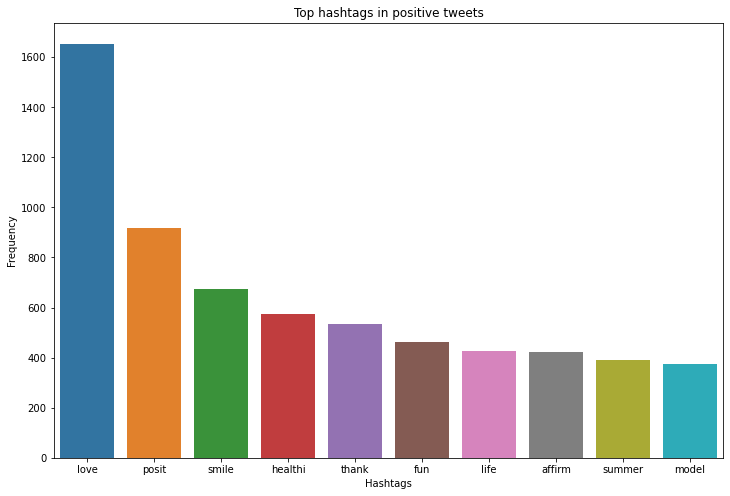

In [32]:
freq_df = freq_df.nlargest(columns='Frequency', n=10)
plt.figure(figsize = (12,8))
sns.barplot(data=freq_df, x='Hashtags', y='Frequency')
plt.title('Top hashtags in positive tweets')
plt.show()

In [33]:
freq = nltk.FreqDist(ht_neg)
freq_df = pd.DataFrame({'Hashtags': list(freq.keys()),
                       'Frequency': list(freq.values())})
freq_df.head()

,Hashtags,Frequency
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


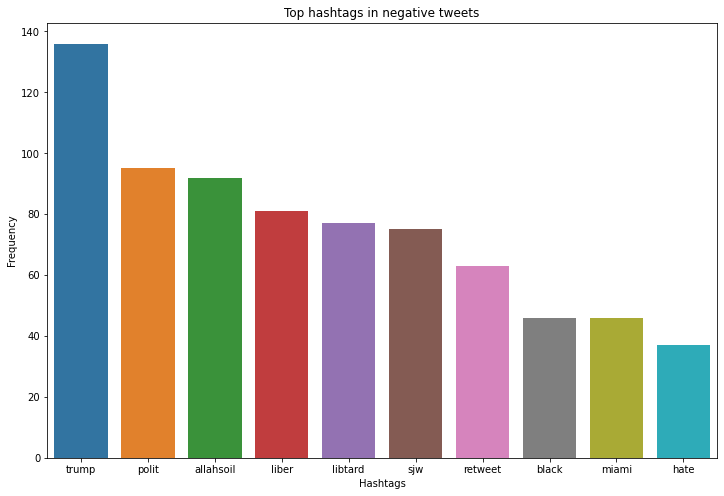

In [35]:
freq_df = freq_df.nlargest(columns='Frequency', n=10)
plt.figure(figsize = (12,8))
sns.barplot(data=freq_df, x='Hashtags', y='Frequency')
plt.title('Top hashtags in negative tweets')
plt.show()

Feature Extraction

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer(max_df=0.9, min_df=2, max_features=5000, stop_words='english')
bow = bag_of_words.fit_transform(df['clean_tweet'])

In [49]:
print(type(bow))

<class 'scipy.sparse.csr.csr_matrix'>


In [50]:
print(bow[0])

  (0, 1468)	1
  (0, 3913)	1
  (0, 1213)	1
  (0, 2319)	1
  (0, 3797)	1


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [53]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
pred = model.predict(x_test)
fscore = f1_score(y_test,pred)
acc = accuracy_score(y_test,pred)
print('F1 Score:', fscore)
print('Accuracy:', acc)

F1 Score: 0.621978021978022
Accuracy: 0.9569515705168314


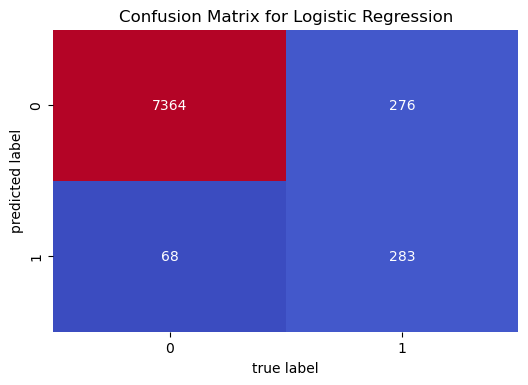

In [67]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False, cmap='coolwarm')

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Naive Bayes Model

In [56]:
from sklearn.naive_bayes import MultinomialNB 
model_naive = MultinomialNB().fit(x_train, y_train) 

In [58]:
predicted_naive = model_naive.predict(x_test)
fscore_naive = f1_score(y_test, predicted_naive)
acc_naive = accuracy_score(y_test, predicted_naive)
print('F1 Score:', fscore_naive)
print('Accuracy:', acc_naive)

F1 Score: 0.6568867155664222
Accuracy: 0.9473157301964711


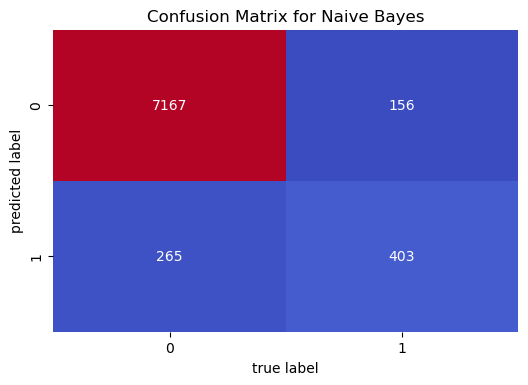

In [66]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False, cmap='coolwarm')

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()